In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# 원본 이미지 resize

In [ ]:
# 압축을 풀고
# %cd /content/drive/MyDrive/study/recycle/CNN/data_origin
# !unzip -qq /content/drive/MyDrive/study/recycle/CNN/final.zip

# 압축파일 지우고
# %cd /content/drive/MyDrive/study/python/img_resize2
# train_resize.zip

# 혹시 있을 이상한 디렉토리 지우고
# %cd /content/drive/MyDrive/study/python/img_resize2
# !rmdir .ipynb_checkpoints

/content/drive/MyDrive/study/recycle/CNN/data_origin


In [ ]:
# 1. 이미지를 resize 합니다.
# import cv2
# import os
# import numpy as np

# path = 'C:\\cnn\\origin'  # 원본 위치
# file_list = os.listdir(path)  # 파일 이름 불러오는 부분

# for k in file_list:  # 리스트 안에 있는 파일들을 하나씩 빼내는 코드
#     img = cv2.imread(path + '\\' + k)  # 이미지 데이터를 행렬로 숫자로 변환합니다.
#     resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)  # 32×32 로 resize 합니다.
#     cv2.imwrite('C:\\cnn\\resize\\' + k, resize_img)  # resize 한 이미지를 저장합니다.

# image_load 함수로 숫자 행렬로 변환

In [ ]:
# 압축을 풀고
%cd /content/drive/MyDrive/study/recycle/CNN/data_resize
!unzip -qq /content/drive/MyDrive/study/recycle/CNN/resize.zip

/content/drive/MyDrive/study/recycle/CNN/data_resize


In [ ]:
!ls -l *.jpg | wc -l

350


In [ ]:
# 사진 전처리 코드 
train_images = '/content/drive/MyDrive/study/recycle/CNN/data_resize'

def image_load(path):
    import os
    import re
    import cv2
    import numpy as np
    
    file_list = os.listdir(path)  # os의 특정 폴더에 있는 파일들을 불러오는 코드
    file_name = []
    for i in file_list:
        a = int( re.sub('[^0-9]', '', i) )  # i가 숫자가 아니라면 null 로 변경해라 
        file_name.append(a)
    file_name.sort()

    file_res = []
    for j in file_name:
        file_res.append(path + '/' + str(j) + '.jpg')
         
    image = []
    for k in file_res:
        img = cv2.imread(k)  # 이미지를 숫자로 변환합니다.
        image.append(img)

    return np.array(image) 

print( image_load(train_images).shape )  # (350, 32, 32, 3)

(350, 32, 32, 3)


# 정답 csv 파일을 생성

In [ ]:
# 2. 정답 csv 파일을 생성
# path = 'C:\\cnn\\train_label.csv'

# file = open(path, 'w')

# for i in range(1, 176):
#     file.write(str(0) + '\n')
# for i in range(176, 351):
#     file.write(str(1) + '\n')
    
# file.close()

# 신경망을 생성하여 데이터를 넣고 학습

In [ ]:
!rm -r '/content/drive/MyDrive/study/recycle/CNN/result'
!mkdir '/content/drive/MyDrive/study/recycle/CNN/result'

# 1. 필요한 패키지 가져오는 코드 
import tensorflow as tf  # 텐써 플로우 2.0 
from tensorflow.keras.datasets.mnist import load_data  # 텐써 플로우에 내장되어있는 mnist 데이터를 가져온다.
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout  # 완전 연결계층을 구성하기 위한 모듈
from tensorflow.keras.utils import to_categorical  # one hot encoding 하는 모듈
from tensorflow.keras.initializers import glorot_uniform
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import random


# label_load 함수 full code:
def label_load(path):
    import csv
    
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []
    for i in labeldata:
        labellist.append(i)
            
    label = np.array(labellist)
    label = label.astype(int)  # 숫자로 변환
    label = to_categorical(label)
    
    return label

train_label = '/content/drive/MyDrive/study/recycle/CNN/train_label.csv'
print(label_load(train_label).shape)  # (350, 2)

x_train = image_load(train_images)  
y_train = label_load(train_label)


# 2. 정규화 진행  
x_train = x_train / 255


tf.random.set_seed(777)
np.random.seed(777)
random.seed(777)

# 훈련 데이터의 일부(20%)를 테스트 데이터로 사용하기 위해서 훈련 데이터와 테스트 데이터 생성
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=777)


tf.random.set_seed(777)
np.random.seed(777)
random.seed(777)

# 3. 모델을 구성합니다. 2층 신경망으로 구성
# sigmoid / relu / tanh

model = Sequential()
model.add(Conv2D(100, activation='relu', kernel_size=(3,3), kernel_initializer=glorot_uniform(seed=0), padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(100, activation='relu', kernel_size=(3,3), kernel_initializer=glorot_uniform(seed=0), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(100, activation='relu', kernel_size=(3,3), kernel_initializer=glorot_uniform(seed=0), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Flatten(input_shape=()))
model.add(Dense(50, kernel_regularizer='l2', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(25, kernel_regularizer='l2', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, kernel_regularizer='l2', activation='softmax'))


# 4. 모델을 설정합니다. ( 경사하강법, 오차함수를 정의해줍니다. )
# SGD, adagrad, adam, rmsprop
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])  # 학습과정에서 정확도를 보려고 


# 콜백 함수를 정의합니다.
checkpoint = ModelCheckpoint(
                "/content/drive/MyDrive/study/recycle/CNN/result/{epoch:04d}", ############################################################################### ★★★★ 본인이 저장하고자 하는 경로로 모델 저장 경로 지정
                monitor = 'val_acc',  # 테스트 데이터에 대한 정확도를 기준으로 하여 가장 좋은 것으로 측정
                save_best_only = True,     # monitor 되고 있는 것 중에 가장 좋은 모델을 저장
                mode = 'max',              # monitor를 val_acc(정확도)로 했으면 클 수록 좋으므로 max로 설정하고 val_loss(오차)로 했으면 min으로 설정하는 것이 좋음
                save_weights_only = False, # 모델 레이어 및 weights 모두 저장
                verbose = 0,               # 모델이 저장되었으면 저장되었다고 표시(1), 표시 비활성화(0)
                # period = 1 # default로 수행하는 것이 효율이 좋았음
                            )

estop = EarlyStopping(monitor='val_acc', patience=30, verbose=1)

callbacks = [checkpoint, estop]


# 5. 모델을 훈련시킵니다.
history = model.fit(x_train, y_train, 
                    epochs=200,
                    batch_size=20,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)


# 6.모델을 평가합니다. (오차, 정확도가 출력됩니다.)
model.evaluate(x_test, y_test)

(350, 2)
Epoch 1/200
11/14 [======================>.......] - ETA: 0s - loss: 2.1643 - acc: 0.6045 

14/14 [==============================] - 5s 282ms/step - loss: 2.0741 - acc: 0.6464 - val_loss: 2.0211 - val_acc: 0.5000
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 1.7997 - acc: 0.7893 - val_loss: 2.0246 - val_acc: 0.5000
Epoch 3/200
14/14 [==============================] - 0s 7ms/step - loss: 1.6018 - acc: 0.8464 - val_loss: 2.0462 - val_acc: 0.5000
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 1.5281 - acc: 0.8786 - val_loss: 1.9573 - val_acc: 0.5000
Epoch 5/200
14/14 [==============================] - 0s 7ms/step - loss: 1.4258 - acc: 0.9071 - val_loss: 2.0405 - val_acc: 0.5000
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 1.3588 - acc: 0.9286 - val_loss: 2.3230 - val_acc: 0.5000
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 1.3058 - acc: 0.9179 - val_loss: 2.0232 - val_acc: 0.5000
Epoch 8/200
14/14 [==============================] - 0s 7ms/step - loss: 1.2179 - acc: 0.9357

14/14 [==============================] - 3s 234ms/step - loss: 0.4612 - acc: 0.9786 - val_loss: 1.3974 - val_acc: 0.5429
Epoch 28/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4382 - acc: 0.9821 - val_loss: 2.2742 - val_acc: 0.5000
Epoch 29/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4139 - acc: 0.9821 - val_loss: 1.8129 - val_acc: 0.5286
Epoch 30/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3920 - acc: 0.9893 - val_loss: 2.2508 - val_acc: 0.5429
Epoch 31/200
12/14 [========================>.....] - ETA: 0s - loss: 0.3761 - acc: 0.9917

14/14 [==============================] - 3s 259ms/step - loss: 0.3812 - acc: 0.9893 - val_loss: 1.2111 - val_acc: 0.6714
Epoch 32/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3783 - acc: 0.9786 - val_loss: 1.3510 - val_acc: 0.5571
Epoch 33/200
12/14 [========================>.....] - ETA: 0s - loss: 0.3947 - acc: 0.9708

14/14 [==============================] - 3s 236ms/step - loss: 0.3830 - acc: 0.9750 - val_loss: 0.7534 - val_acc: 0.8143
Epoch 34/200
14/14 [==============================] - 0s 7ms/step - loss: 0.4027 - acc: 0.9571 - val_loss: 1.5150 - val_acc: 0.6429
Epoch 35/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3897 - acc: 0.9679 - val_loss: 0.8084 - val_acc: 0.8000
Epoch 36/200
14/14 [==============================] - 0s 7ms/step - loss: 0.3105 - acc: 1.0000 - val_loss: 0.8066 - val_acc: 0.8143
Epoch 37/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2922 - acc: 1.0000 - val_loss: 0.9400 - val_acc: 0.7714
Epoch 38/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2755 - acc: 1.0000 - val_loss: 0.9265 - val_acc: 0.8000
Epoch 39/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2787 - acc: 0.9929 - val_loss: 0.8912 - val_acc: 0.8000
Epoch 40/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2542 - acc:

14/14 [==============================] - 3s 260ms/step - loss: 0.2788 - acc: 0.9643 - val_loss: 0.5943 - val_acc: 0.8714
Epoch 43/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2229 - acc: 0.9964 - val_loss: 0.5223 - val_acc: 0.8714
Epoch 44/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2193 - acc: 0.9964 - val_loss: 0.4839 - val_acc: 0.8714
Epoch 45/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2109 - acc: 0.9893 - val_loss: 0.4839 - val_acc: 0.8429
Epoch 46/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1973 - acc: 0.9964 - val_loss: 0.6670 - val_acc: 0.8571
Epoch 47/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1816 - acc: 1.0000 - val_loss: 0.6221 - val_acc: 0.8714
Epoch 48/200
12/14 [========================>.....] - ETA: 0s - loss: 0.1724 - acc: 1.0000

14/14 [==============================] - 3s 235ms/step - loss: 0.1721 - acc: 1.0000 - val_loss: 0.5597 - val_acc: 0.9000
Epoch 49/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1668 - acc: 1.0000 - val_loss: 0.4734 - val_acc: 0.8857
Epoch 50/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1684 - acc: 0.9929 - val_loss: 0.7033 - val_acc: 0.8429
Epoch 51/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1661 - acc: 0.9964 - val_loss: 0.5878 - val_acc: 0.8429
Epoch 52/200
12/14 [========================>.....] - ETA: 0s - loss: 0.1554 - acc: 0.9917

14/14 [==============================] - 3s 257ms/step - loss: 0.1548 - acc: 0.9929 - val_loss: 0.3266 - val_acc: 0.9429
Epoch 53/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1412 - acc: 1.0000 - val_loss: 0.3245 - val_acc: 0.9429
Epoch 54/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1466 - acc: 1.0000 - val_loss: 0.4433 - val_acc: 0.9000
Epoch 55/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1321 - acc: 1.0000 - val_loss: 0.4284 - val_acc: 0.9143
Epoch 56/200
12/14 [========================>.....] - ETA: 0s - loss: 0.1468 - acc: 0.9917

14/14 [==============================] - 3s 233ms/step - loss: 0.1473 - acc: 0.9929 - val_loss: 0.3350 - val_acc: 0.9571
Epoch 57/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2239 - acc: 0.9679 - val_loss: 0.6173 - val_acc: 0.8286
Epoch 58/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1828 - acc: 0.9821 - val_loss: 0.6261 - val_acc: 0.8143
Epoch 59/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1953 - acc: 0.9750 - val_loss: 0.6581 - val_acc: 0.7571
Epoch 60/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2082 - acc: 0.9857 - val_loss: 0.8361 - val_acc: 0.7429
Epoch 61/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2130 - acc: 0.9786 - val_loss: 0.5217 - val_acc: 0.8429
Epoch 62/200
14/14 [==============================] - 0s 7ms/step - loss: 0.1781 - acc: 0.9893 - val_loss: 1.4197 - val_acc: 0.6571
Epoch 63/200
14/14 [==============================] - 0s 7ms/step - loss: 0.2060 - acc:

[0.41943487524986267, 0.8999999761581421]

[0.6464285850524902, 0.7892857193946838, 0.8464285731315613, 0.8785714507102966, 0.9071428775787354, 0.9285714030265808, 0.9178571701049805, 0.9357143044471741, 0.9392856955528259, 0.9428571462631226, 0.9607142806053162, 0.9678571224212646, 0.9428571462631226, 0.9714285731315613, 0.9892857074737549, 0.9821428656578064, 0.9857142567634583, 0.9857142567634583, 0.9964285492897034, 0.9964285492897034, 0.9928571581840515, 1.0, 0.9821428656578064, 0.9857142567634583, 0.9821428656578064, 0.9892857074737549, 0.9785714149475098, 0.9821428656578064, 0.9821428656578064, 0.9892857074737549, 0.9892857074737549, 0.9785714149475098, 0.9750000238418579, 0.9571428298950195, 0.9678571224212646, 1.0, 1.0, 1.0, 0.9928571581840515, 0.9964285492897034, 0.9964285492897034, 0.9642857313156128, 0.9964285492897034, 0.9964285492897034, 0.9892857074737549, 0.9964285492897034, 1.0, 1.0, 1.0, 0.9928571581840515, 0.9964285492897034, 0.9928571581840515, 1.0, 1.0, 1.0, 0.9928571581840515, 0.9678571224212646, 0.9821428

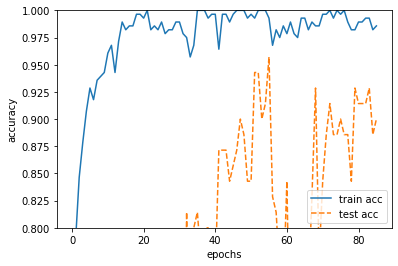

In [ ]:
# 시각화 코드
train_acc_list = history.history['acc']     # 훈련 데이터의 정확도들
test_acc_list = history.history['val_acc']  # 테스트 데이터의 정확도들
print( train_acc_list )

# 시각화까지 하세요
import matplotlib.pyplot as plt

x = np.arange( len(train_acc_list) )
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc',  linestyle='--')
plt.ylim(0.8, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/study/recycle/CNN/result/0056')

In [ ]:
results = model.predict(x_test)

# 정확도 출력
y_hat = np.argmax(results, axis=1)
y_label = np.argmax(y_test, axis=1)

print( np.sum(y_hat == y_label) / len(y_test) )

3/3 [==============================] - 0s 4ms/step
0.9571428571428572


In [ ]:
model.save('/content/drive/MyDrive/study/recycle/CNN/recycle_model.h5')